# NLP basics

NLP modeling is no much difference from other ML models in its workflow: input-->model-->output. The devil is in details.  We will cover the difference in input, output, and model respectively. 

## NLP Input: A history of representing text in numbers

The major difference in text input is: text are not numbers, thus computer can not understand. So the first step in NLP modeling is vectoring the text. This process is called 'text vectorization', or 'embedding'.Nothing mysteries, you just need to come up with a clever way to convert text into numbers. How are we going to do that?

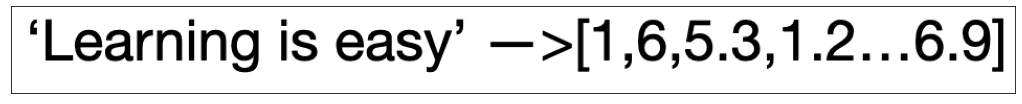

In [ ]:
import utils
utils.show_img('../NLP/img/vectorization.png', size_inch=18)

#### Simple Encoding
The simplest way is to do one-hot encoding for each character/word. In English, you have 26 letters, and some special characters and symbols, and emoji of course. You can make a long vector whose length is the number of unique character/symbol. Then it's done! Simple, right?

<font color='red'>Question:</font> What is the problem of this method? Can you come up with a better solution? (Hint: check Unicode, UTF8 systems)

【A: 
There are problems of this methods:

High-dimensional representation
Unicode encompasses a vast number of characters, resulting in a griant vocabulary size because each unique character requires a separate binary feature in the one-hot encoding representation;
The dimensionality of the representation results extremely high, leading to a sparse and computationally expensive encoding;
Lack of meaningful similarity information
One-hot encoding treats each character or word as independent and unrelated.
Caputuring NO semantic or contextual information ---> the encoded vectors offering no inherent notion of similarity or relatedness between different characters or words.
Data sparsity
Always only a small subset of characters or words occurs frequently;
Leading to a highly sparse representation, with the majority of the one-hot encoded vectors containing mostly zeros.
Sparse representations consuming significant memory and computational resources, especially when dealing with large datasets.
Inability to handle out-of-vocabulary (OOV) items
Requiring predefined vocabulary or character set.
Any unseen or out-of-vocabulary items cannot be represented using one-hot encoding ---> a problem when encountering new or rare characters or words during inference.
To allivate such issues, CounterVector and Term Frequency Inverse Document Frequency are relatively simple solutions that cannot solve issues listed above. Much better solutions are word embeddings (e.g., Word2Vec, GloVe, FastText) and character embeddings (e.g., CNN, LSTM, Transformer), which capture semantic and contextual information while reducing dimensionality and handling OOV items more effectively.
】

#### CV and TFIDF
OK, this way is too naive, we don't want to do some this stupid thing sounds like encryption in World War II. Let's make it more complex. Let's use WORD instead of characters. To go even further, let's do counting. In this way, the most frequent words would have higher values. This method is called: Count Vectorization. 

<font color='red'>Question:</font> Write the code to to Count Vectorization. (intermediate: use package in sklearn. Hard: write the code from scratch.) 【see codes below】

<font color='red'>Question:</font> What is the problem with this method? How can you fix this? 

【A: 
1. Not caturing the semantic content (and does not preserve the order of the words in original text)
2. Give a very sparse vectors --> easily result in curse of dimensionality
3. Large vocabulary size: if the corpus is large and contains many unique workds, the resulting bag of words matrix can be very large and memory-intensive. This can make it difficult to work with the matrix in memory, especially on machines with limited RAM. 
4. stop words: countvectorizer includes an option to remove strop words from vocabulary. However, this can sometimes remove important information from the text, especially for certain applications like sentiment analysis. It is important to carefully consider whether or not to remove stop words. 
5. n-grams: by default, CV only considers individual words as features. However, it is often useful to also consider multi-word phrases (n-grams) as features. CV includes an option to consider n-grams, but the resulting vocabulary can become very large.
6. Normalization: CV does not perform any normalization on the text (e.g. lowercasing, stemming, stc.), which can impact the quality of the resulting features. It is often useful to perform some kind of normalization before applying CV. 
7. out-of-vocabulary words: if cv encounters a word in the test set that was not present in the training set, it will simply ignore it. This can lead to loss of information, especially if the test set contains many words that were not presetn in the training set. Some ways to handel this, such as using character-level n-gram or subword embeddings. 】

Some really clever guy came up with the solution of Term Frequency Invert Document Frequncy (TFIDF) method.  
<font color='red'>Question:</font> What is TF? What is IDF? Why TFIDF is superior than CV? 

【A：
<font color='orange'>Term Frequency:</font>  
* A numerical representation that quantifies the frequency of a term or word within a document or a collection of documents.  
$$\text{TF(t, d) = (Number of occurrences of term "t" in document "d") / (Total number of terms in document "d")}$$

<font color='orange'>Invert Document Frequency:</font>
* A measure to quantify the importance or rarity of a term in a collection of documents.
$$\text {IDF(t) = log(Total number of documents in the corpus / (Number of documents that contain the term "t" + 1))}$$


If a word frequently shows in a document but not very frequently in the collection of all documents, this word is important to that document. If a word frequently shows in all documents, this word is very likely unimportant like a stop word.

Words with high TFIDF indicate the words are quite special and important to the text and therefore they could show the topic of the text. Words with high counts alone are not always indicative.】

<font color='red'>Assignment:</font> Write the code to do TFIDF vectorization. (intermediate: use package in sklearn. Hard: write the code from scratch.) What parameters can be tuned in TFIDF model? What is n-gram? Why n-gram is useful?

【A: see codes below. Parameters to tune: 
1. 'stop_words': Specifies the stop words to be removed from the text. It can be set to a list of stop words or to the string "english" to use the built-in list of English stop words.

2. 'ngram_range': Specifies the range of n-grams to be used in the analysis. For example, setting ngram_range=(1, 2) will include unigrams and bigrams in the analysis.

3. 'max_df': Specifies the maximum document frequency of a term. Terms that have a document frequency higher than this threshold will be ignored.

4. 'min_df': Specifies the minimum document frequency of a term. Terms that have a document frequency lower than this threshold will be ignored.

5. 'max_features': Specifies the maximum number of features (i.e., terms) to be included in the vocabulary.】


#### n-gram:

An n-gram is a contiguous sequence of n items from a given sample of text, where the items can be characters, words, or other units of meaning. For example, a bigram is an n-gram of size 2, consisting of pairs of consecutive words in a sentence.

N-grams are useful because they capture information about the context in which words appear. By including n-grams in the analysis, we can capture information about phrases and collocations that might not be captured by individual words alone. For example, the bigram "machine learning" might be more informative than the individual words "machine" and "learning" on their own.

However, including n-grams can also increase the dimensionality of the feature space and make the analysis more computationally expensive. Therefore, it's important to consider the trade-off between including n-grams and computational complexity when tuning the parameters of a text vectorization model.


#### Cons of TFIDF:

1. Bias towards rare terms: TF-IDF weights words based on their frequency in a document and their rarity in the corpus. This means that rare terms that appear in only a few documents may receive very high weights, even if they are not particularly informative. This can lead to overfitting and poor generalization performance, especially for small or imbalanced datasets.

2. Insensitivity to word order: Because TF-IDF treats each word independently, it does not capture the order or context in which words appear in a document. This can be a disadvantage for tasks that require modeling the syntax or semantics of text, such as language modeling or sentiment analysis.

3. Sensitivity to document length: The IDF component of TF-IDF is inversely proportional to the frequency of a term in the corpus, which means that very common terms (such as stop words) can have very low IDF scores. This can result in a bias towards longer documents, since they are more likely to contain rare terms that receive higher weights. To mitigate this, it's often a good idea to normalize the TF-IDF weights by the length of the document.

4. Difficulty in handling out-of-vocabulary terms: Like most bag-of-words models, TF-IDF requires a fixed vocabulary of terms to be defined before the analysis can be performed. This means that out-of-vocabulary terms (i.e., words that are not in the vocabulary) cannot be represented in the model. There are several techniques for handling out-of-vocabulary terms, such as adding an "unknown" token to the vocabulary or using subword units, but these can add additional complexity to the model.


<font color='green'>Wow, if it is 1990 now, and you know TFIDF, you are very prepared to start a search company called Google or Baidu! You will be super rich today. </font>

### Question: Write the code to to Count Vectorization.

In [3]:
# intermediate: use package in sklearn.

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
corpus = ["one one", "one two two", "one two three three", "one two three four", "one two three four five", "fifty", "ten"]

cv = CountVectorizer()
X = cv.fit_transform(corpus)
cv.vocabulary_

# sklearn's CountVectorizer indices are in alphabetic order

{'one': 3, 'two': 6, 'three': 5, 'four': 2, 'five': 1, 'fifty': 0, 'ten': 4}

In [ ]:
X.todense() # X is saved in sparse matrix. use .todense() or .toarray() to show

matrix([[0, 0, 0, 2, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 2],
        [0, 0, 0, 1, 0, 2, 1],
        [0, 0, 1, 1, 0, 1, 1],
        [0, 1, 1, 1, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]])

In [ ]:
cv.transform(["16", "two"]).toarray()

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1]])

In [ ]:
# Hard: write the code from scratch
import pandas as pd
import numpy as np
from collections import defaultdict
import re

class Manual_cv:
    def fit(self, corpus, stop_words=[], analyzer="word"):
        """
        Manual counter vectorizer
        corpus: a 1D list of strings to be trained, e.g., ["This is a sentence.", "one", "two three four"]
        stop_words: a list of stop words
        """
        assert analyzer in ["word", "char"], "analyzer can only be 'word' or 'char'"
        
        # “+” reduces consecutive dropout characters to one space. e.g. "123" becomes " " instead of "   "
        corpus = [re.sub('[^A-Za-z0-9]+', ' ', s).strip().lower() for s in corpus]
        self.analyzer = analyzer
        
        self.dictionary = set()
        for sentence in corpus:
            if analyzer == "word":
                temp = sentence.split()
            else:
                temp = [*sentence]
            self.dictionary.update(set(temp))
        
        self.dictionary = self.dictionary - set(stop_words) 
        
        self.dictionary = sorted(self.dictionary)
        
        self.vocabulary_ = {w: self.dictionary.index(w) for w in self.dictionary}
        self.index2word = {index: word for word, index in self.vocabulary_.items()}
        
        return
    
    def transform(self, text):
        """
        This function transforms a text containing a list of sentences into counts based on train corpus dictionary_
        text: a list of string, e.g. ["This is a sentence.", "one", "two three four"]
        Any symbols other than A-Z, a-z and 0-9 will be ignored
        """
        text = [re.sub('[^A-Za-z0-9]+', ' ', s).strip().lower() for s in text]
        
        output = pd.DataFrame(columns = range(len(self.dictionary)))
        
        for sentence in text:
            counter = defaultdict(int)
            if self.analyzer == "word":
                temp = sentence.split()
            else:
                temp = [*sentence]
            for w in temp:
                if w in self.vocabulary_:
                    counter[self.vocabulary_[w]] += 1
            # append the counts into output
            output = output.append(counter, ignore_index=True)
        
        output.fillna(0, inplace=True)
        output = output.astype(int)
        
        return output    
     
    def fit_transform(self, corpus, stop_words=[], analyzer="word"):
        self.fit(corpus, stop_words, analyzer)
        return self.transform(corpus)
        

In [ ]:
m = Manual_cv()
m.fit(corpus)
m.vocabulary_

{'fifty': 0, 'five': 1, 'four': 2, 'one': 3, 'ten': 4, 'three': 5, 'two': 6}

In [ ]:
m.fit_transform(corpus)

,0,1,2,3,4,5,6
0,0,0,0,2,0,0,0
1,0,0,0,1,0,0,2
2,0,0,0,1,0,2,1
3,0,0,1,1,0,1,1
4,0,1,1,1,0,1,1
5,1,0,0,0,0,0,0
6,0,0,0,0,1,0,0


In [ ]:
m.transform(["I have one, two, three, four apples."])

,0,1,2,3,4,5,6
0,0,0,1,1,0,1,1


In [ ]:
m = Manual_cv()
m.fit(corpus, stop_words=["one"])
m.vocabulary_

{'fifty': 0, 'five': 1, 'four': 2, 'ten': 3, 'three': 4, 'two': 5}

In [ ]:
m = Manual_cv()
m.fit(corpus, analyzer="char", stop_words=[" "])
m.dictionary

['e', 'f', 'h', 'i', 'n', 'o', 'r', 't', 'u', 'v', 'w', 'y']

### Write the code to do TFIDF vectorization

In [7]:
corpus

['one one',
 'one two two',
 'one two three three',
 'one two three four',
 'one two three four five',
 'fifty',
 'ten']

In [5]:
# intermediate: use package in sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus)
tfidf.vocabulary_
# indices are generated based on alphabetic order

{'one': 3, 'two': 6, 'three': 5, 'four': 2, 'five': 1, 'fifty': 0, 'ten': 4}

In [ ]:
X.toarray() # by default, L2 normal per row

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.40119247, 0.        ,
        0.        , 0.91599378],
       [0.        , 0.        , 0.        , 0.3293528 , 0.        ,
        0.86611871, 0.37598552],
       [0.        , 0.        , 0.60813534, 0.39533189, 0.        ,
        0.51981393, 0.45130652],
       [0.        , 0.59098803, 0.49057082, 0.31890646, 0.        ,
        0.41932367, 0.36406009],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ]])

In [ ]:
# TFIDF V1
import numpy as np

def calculate_tfidf(corpus):
    words = []
    for doc in corpus:
        words.extend(doc.lower().split())
    words = sorted(set(words))
    print(words)
    tfidf_matrix = np.zeros((len(corpus), len(words)))
    for i, doc in enumerate(corpus):
        words_count = len(doc.lower().split())
        for j, word in enumerate(words):
            tf = doc.count(word) / words_count
            idf = np.log(len(corpus) / (1 + sum(1 for doc in corpus if word in doc)))
            tfidf_matrix[i, j] = tf * idf
    return tfidf_matrix

tfidf_matrix = calculate_tfidf(corpus)

print(tfidf_matrix)

In [ ]:
# TFIDF V2
from sklearn.preprocessing import Normalizer

class Manual_tfidf:
    def fit(self, corpus, stop_words=[], analyzer="word"):
        """
        Manual TFIDF (不包括n-gram功能)
        corpus: a 1D list of strings to be trained, e.g., ["This is a sentence.", "one", "two three four"]
        stop_words: a list of stop words
        calculate IDF in fit()
        IDF(t) = log_e(Total number of documents / Number of documents with term t in it)        
        """
        assert analyzer in ["word", "char"], "analyzer can only be 'word' or 'char'"
        
        corpus = [re.sub('[^A-Za-z0-9]+', ' ', word).strip().lower() for word in corpus]
        self.analyzer = analyzer
        
        self.dictionary = set()
        t_counter = defaultdict(int) # count the number of documents with term t in it 
        for sentence in corpus:
            if analyzer == "word":
                temp = set(sentence.split())
            else:
                temp = set([*sentence])
            self.dictionary.update(temp)
            for t in temp:
                t_counter[t] += 1
        
        self.dictionary = self.dictionary - set(stop_words)        
        self.dictionary = sorted(self.dictionary)

        self.vocabulary_ = {w: self.dictionary.index(w) for w in self.dictionary}
        self.index2word = {index: word for word, index in self.vocabulary_.items()}
        
        # calculate IDF        
        self.idf = {}
        total_docs = len(corpus)
        for t in self.dictionary:
            self.idf[t] = np.log(total_docs / (t_counter[t] + 1e-6))
        
        return
    
    def transform(self, docs):
        """
        This function transforms a list of words into to TFIDF scores
        TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)
        TFIDF score: TF(t, d) * IDF(t), L2 normalization on each row
        An input example: ["This is a sentence.", "one", "two three four"]
        Any symbols other than A-Z, a-z and 0-9 will be ignored
        Calculate TF and TFIDF in transform()
        """
        docs = [re.sub('[^A-Za-z0-9]+', ' ', doc).strip().lower() for doc in docs]
        
        # create a dataframe to store TF and later TFIDF
        tfidf = pd.DataFrame(np.zeros((len(docs), len(self.dictionary))), columns=self.dictionary)      
            
        # record number of times term t appears in each document
        for i in range(len(docs)):
            counter = defaultdict(int)
            if self.analyzer == "word":
                temp = docs[i].split()
            else:
                temp = docs[i]
            
            for w in temp: # count words in each doc
                if w in self.dictionary:
                    counter[w] += 1
            
            for w in counter: # update word counts (t) into tfidf
                tfidf.loc[i,w] = counter[w]
                
        # divide word counts by the total word count in each document. this makes TF
        # only the words in vocabulary are counted into total word count. is it correct?
        tfidf = tfidf.div(tfidf.sum(axis=1) + 1e-6, axis=0) 
            
        # TF * IDF
        for col in tfidf.columns:
            tfidf[col] = tfidf[col] * self.idf[col]
        
        # L2 normalization
        normalizer = Normalizer(norm='l2')
        tfidf = pd.DataFrame(normalizer.fit_transform(tfidf), columns=tfidf.columns)

        return tfidf
     
    def fit_transform(self, corpus, stop_words=[], analyzer="word"):
        self.fit(corpus, stop_words, analyzer)
        return self.transform(corpus)
        

In [ ]:
my_tfidf = Manual_tfidf()
my_tfidf.fit_transform(corpus)

,fifty,five,four,one,ten,three,two
0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000
1,0.0,0.000000,0.000000,0.287899,0.0,0.000000,0.957661
2,0.0,0.000000,0.000000,0.185277,0.0,0.933122,0.308150
3,0.0,0.000000,0.760479,0.204252,0.0,0.514345,0.339710
4,0.0,0.763232,0.491364,0.131972,0.0,0.332330,0.219495
5,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000


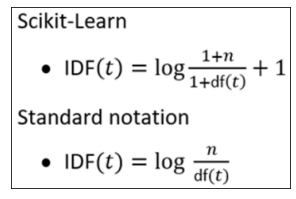

In [ ]:
# Manual_tfidf gives slightly different results from sklearn tfidf
# this is because sklearn actually defines IDF slightly different
# https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/
utils.show_img("IDF in sklearn.png", size_inch=5)

# TFIDF V3

https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089
    

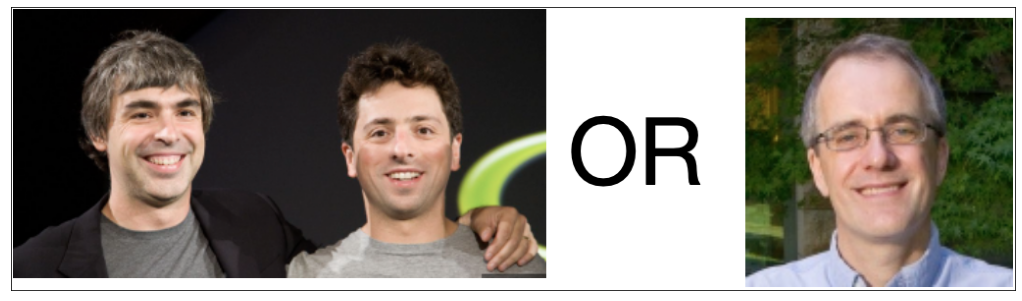

In [ ]:
import utils
utils.show_img('../NLP/img/g_or_s.png', size_inch=18)

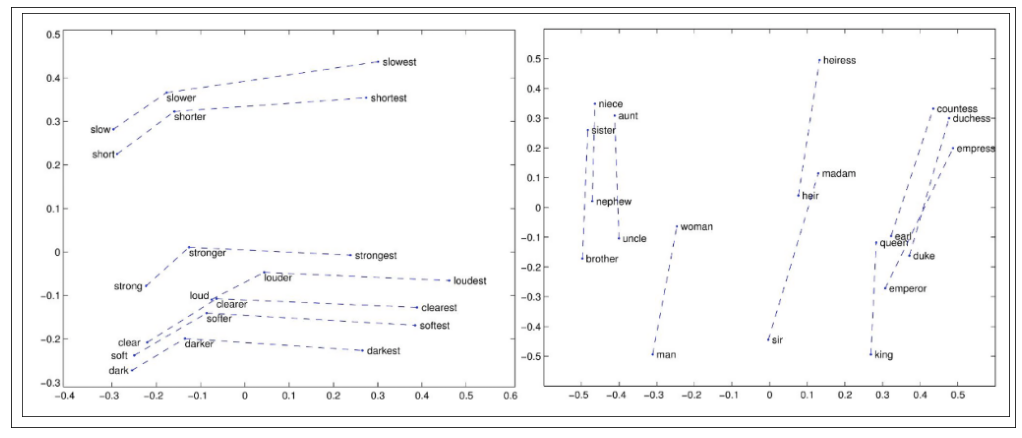

In [ ]:
import utils
utils.show_img('img/word2vec.png', size_inch=18)

#### Word2Vec
<font color='green'>Or you could go to Stanford, sitting with Chris Manning and discuss: How can we improve the word vectorization even further?</font> Chris was just an assistant professor then, and eagerd to have some research assistant. 

<font color='red'>Question:</font> What is word2vec? Why it is superior than TFIDF? How word2vec was trained? How the contextual information enter into the embedding?

【A：the essential idea of word2vec is to embed a word in a high dimentional space so that the semantic relationship between words are converted to distances in this space. The words that have similar meanings are close to each other, while two words are very different are far away. The relative relationships between words are also kept, as shown in the plot above. 

##### Training
Word2vec is typically trained using a neural network architecture called a "feedforward neural network" or a "continuous bag-of-words (CBOW) model". The training process is unsupervised, which means that the model learns to predict the likelihood of a word based on its context, without any explicit labels or guidance.

The training process involves feeding the model a large corpus of text, one sentence at a time. The model then tries to predict the target word given its surrounding words, or vice versa. For example, given the sentence "The cat sat on the mat", the model might be trained to predict the word "sat" given the words "cat", "on", and "the".

As the model is trained, the weights of the neural network are updated to minimize the difference between the predicted and actual outputs. The result is a set of high-dimensional vectors, one for each word in the vocabulary, that capture the context and meaning of the word based on its usage patterns in the text corpus.

There are two main variations of word2vec: CBOW and skip-gram. In the CBOW model, the model predicts the target word based on its context words. In the skip-gram model, the model predicts the context words given a target word. Both models have been found to produce high-quality word embeddings, depending on the specific task and corpus of text.

TFIDF only reveals the frequency of words in documents. Although n-gram helps TFIDF to get information of high-frequency neighboring words, it's not as powerful and flexible as word2vec.

1. Continouos Bag of Words (CBOW)
    * <font color='orange'>context words</font> surrounding the target word is are <font color='orange'>inputs</font>
    * <font color='orange'>target word</font> is <font color='orange'>output</font>
    * <font color='orange'>Example</font>: predict "cat" based on the context words "The", "sat", "on ", and "the".
    * architect
        ```python

        from keras.models import Sequential
        from keras.layers import Dense, Embedding, Lambda
        import numpy as np

        # Define the CBOW model
        def create_cbow_model(vocab_size, embedding_size, context_size):
            model = Sequential()
            # Input layer
            model.add(
                # embedding layer
                # takes one-hot encoded context word vectors as input
                # transforms them into dense word vectors of the specified embedding size. 
                Embedding(
                    input_dim=vocab_size, 
                    output_dim=embedding_size, 
                    input_length=context_size
                )
            )
            # Projection layer
            model.add(
                # lambda layer
                # computes the average of the word vectors in the context
                # effectively aggregating the contextual information.
                Lambda(
                    lambda x: np.mean(x, axis=1), 
                    output_shape=(embedding_size, )
                )
            )
            # Output layer
            # dense layer
            # predicting the target word using a softmax activation function
            model.add(Dense(units=vocab_size, activation='softmax'))
            # Compile the model
            model.compile(
                loss='categorical_crossentropy', optimizer='adam'
            )
            return model
        ```

2. Skip-gram  
    * <font color='orange'>coutext words</font> surrounding the target word is <font color='orange'>output</font>
    * <font color='orange'>target word</font> is <font color='orange'>input</font>
    * <font color='orange'>Example</font>: predict "The", "sat", "on ", and "the" based on the context words "cat".
    * architect

        ```python
        from keras.models import Sequential
        from keras.layers import Dense, Embedding, Lambda
        import numpy as np

        # Define the Skip-gram model
        def create_skipgram_model(vocab_size, embedding_size):
            model = Sequential()
            # Input layer
            # takes a single input word index
            # transforms it into dense word vectors of the specified embedding size. 
            model.add(
                Embedding(
                    input_dim=vocab_size, 
                    output_dim=embedding_size, 
                    input_length=1  # different from CBOW
                )
            )
            # Projection layer
            model.add(
                # lambda layer
                # squeezes the resulting vector to 
                # remove the extra dimension added by the Embedding layer.
                Lambda(
                    lambda x: np.squeeze(x, axis=1) # different from CBOW
                )
            )
            # Output layer
            # dense layer
            # predicting the context words using a softmax activation function
            model.add(Dense(units=vocab_size, activation='softmax'))
            # Compile the model
            model.compile(
                loss='categorical_crossentropy', optimizer='adam'
            )
            return model
        ```


】

<font color='red'>Assignment:</font> Write the code to convert the text'Tom and Jerry are good friend? or not?' to a vector using word2vec.

【see code below】

<font color='red'>Question:</font> List several embedding methods that appear at that time. (Hint: they are quite big name now! ) Write down how they are trained?

【A: 

1. GloVe (global vectors) embedding: 
GloVe, or Global Vectors for Word Representation, was introduced by Pennington et al. in their 2014 paper "GloVe: Global Vectors for Word Representation". GloVe is a count-based method that learns word embeddings based on co-occurrence statistics of words in a corpus. The method constructs a co-occurrence matrix that counts the number of times each word appears in the context of every other word in the corpus. Then, it factorizes this matrix to obtain a low-dimensional word embedding matrix.

    GloVe is trained using co-occurance matrix, which comes from statistics of the corpus. $x_{ij}$ stands for the global counts of word j co-occurs with word i in the a fixed-length window across the whole corpus; $v_i$ and $u_j$ stand for the vectors of word i and j; $b_i$ and $b_j$ are the bias of word i and j. The GloVe model trains and updates the vectors to minimize the following loss function (a squared error with weight $h(x_{ij}$)):
$$\sum_{i\in\mathcal{V}} \sum_{j\in\mathcal{V}} h(x_{ij}) \left(\mathbf{u}_j^\top \mathbf{v}_i + b_i + c_j - \log\,x_{ij}\right)^2.$$

2. Paragraph Vector (Doc2Vec): Paragraph Vector, also known as Doc2Vec, was introduced by Le and Mikolov in their 2014 paper "Distributed Representations of Sentences and Documents". Paragraph Vector extends the Word2Vec method to learn document-level embeddings. It is trained using a neural network that predicts a target word given a window of surrounding words and a document-level vector that is unique to each document.

3. FastText: FastText was introduced by Bojanowski et al. in their 2017 paper "Enriching Word Vectors with Subword Information". FastText is an extension of the Word2Vec method that also learns embeddings for character n-grams of a word. The model is trained using a neural network that predicts a target word given its surrounding words and character n-grams.

FastText uses subword embedding technique. Subword embedding is very similar to Word2Vec except it breaks down each word to 2-6 sequential letters (so-called subword) and then trains on these subword tokens instead of whole word tokens. Subword embedding enables the model to learn etymology, and therefore helps the model to better understand rarely occured words in the corpus or even the words not present in the corpus.



|Embeding method|How trained|Insights|
|:----:|:----|:----|
| Global Vectors for Word Representation (GloVe)|An unsupervised learning algorithm for generating word embeddings by combining global matrix factorization techniques with local context windows to capture semantic and syntactic relationships between words| Aiming to capture word co-occurrence statistics in a global context.| 
|FastText|Incorporates subword information into word embeddings by representing words as bags of character n-grams and learning embeddings for both individual words and subword units|Particularly effective for handling out-of-vocabulary words and morphologically rich languages.|
| Latent Semantic Analysis (LSA)/ Latent Semantic Indexing (LSI)| A statistical method that uses matrix factorization techniques to create word embeddings by leveraging singular value decomposition (SVD) to reduce the dimensionality of the term-document matrix and uncover latent semantic relationships between words.|Aiming to capture the latent semantic structure of the text.|
|Hierarchical Bayesian Language Model (HLBL)|A hierarchical Bayesian model that learns embeddings by modeling word distributions at different levels of a hierarchical tree |Capturing both syntactic and semantic relationships between words. Use cases as language modeling and document classification.|

】

#### Model Based Embedding
We will cover this in later part. 

#### Summary 
<font color='red'>Question:</font> Review the previous embedding methods, and list: How to embed a word? How to embed a sentence? How to embed a paragraph? How to embed a product sold on Amazon? How to embed a customer?

【A:

To embed a word, 
1. use pre-trained model to get vectors, or 
2. train a new model use your own corpus. When your corpus is too small, this method is not suitable. Then we can use the vectors to identify similarity or analogy.
3. useful tools include word2vec, GloVe, fastText

To embed a sentence or a paragraph,  
1. averaging word embedding: use a pre-trained or self-trained word2vec model to get vectors of each word, and then calculate the average of the vectors to represent the sentence or paragraph. This method is light weighted and requires less computation, but it treats each word independently and can hardly get the context information. Therefore, this method is not optimal for large tasks. 
2. Doc2Vec is an extension of word2vec to apply on sentences, paragraphs, or documents. In Doc2Vec, each sentence is assigned a unique identifier, and the model learns to predict the context of the sentence from the identifier, along with the word embeddings of the words in the sentence. This method is able to capture the overall context information.
3. Transformer-based models, such as BERT, are pre-trained models that can be fine tuned to specific tasks. These models generate context-aware sentence embeddings by processing the entire sentence as a sequence of tokens.

To embed a product sold on Amazon, we can use the product name, brand, category, price, feature description, sales history (how many pieces are sold per month/year), seasoning and rating.

To embed a customer, we can use the purchasing history (category, frequency, $ spent, membership, number and limit of credit cards or other payment methods on file, frequency to use Amazon cloud and watch Amazon videos) and the demographic information (age, gender, family members, locations) 


|Category|Embeding Method|
|:----:|:----|
|word|Tokenize the word --> Choose a word embeding model, such as GloVe or Word2Vec --> Embedding look up if the word in the embedding model, otherwise need to handle OOV|
|sentence|1) Averaging Word Embeddings: using pre-trained word embeddings for each word, then averaging the embeddings to obtain a single vector representation for sentence; 2) Pre-trained Sentence Embedding Models: specifially degsined for sentence embedding, such as Universal Sentence Encoder (USE) or InferSent. Models tend to capture the semantic meaning; 3) Hierarchial Embeddings: combines both word and sentence embeddings by embedding the each word first, then use RNN or CNN to capture the sentence level information, and finally using such information as sentence embedding.
|paragraph|1) Hierarchial Embedding: similar as the described above; 2) Transformer-based models: use transformer-based models such as BERT or GPT, by spliting the paragraphs into smaller chuncks, feeding them into the transformer model to attain contextualized embeddings, then combin them to derive an embedding for the whole paragraph with methods such as averaging, pooling, or attention mechanisms. 3) Paragraph Vector (Doc2Vec): a extension of Word2Vec, by training model on corpus of paragraphs of docs, each of which is associated with unique label and identifier.|
|product|Depending on the description of the product in Amazon, such as title, image, description, and etc. Might include title embedding, image embedding, description embedding, and/or hyrid embedding|
|customer|In general, a customer information will contains profile, review, purchase history, online activities, and etc, which might be appliable with review profile embedding, review embedding, user-item interaction embedding, collaborative filering for product recommendation, or hybrid embedding by utilizing all information above.|

】

### <font color='red'>Assignment:</font> Convert the text'Tom and Jerry are good friend? or not?' to a vector using word2vec.

In [1]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
from gensim.models import Word2Vec

# Text preprocessing

# Download NLTK tokenizer and stopwords
# punkt is actually a collection of tokenizers, 
#       including a sentence tokenizer and a word tokenizer
# punkt tokenizer is trained on the Penn Treebank dataset, which is a collection of text 
#       from various sources, including news articles, academic papers, and literature.
nltk.download('punkt')
nltk.download('stopwords')

# Define the text
text = "Tom and Jerry are good friends? or not?"

# Tokenize the text
tokens = nltk.word_tokenize(text.lower())

# Remove stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EFGUV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EFGUV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
print(tokens) # stop words were removed
print(stop_words)

['tom', 'jerry', 'good', 'friends', '?', '?']
{'before', 'off', 'y', 'should', 'mustn', 'now', 'do', "wouldn't", 'some', 'is', 've', "didn't", "hadn't", 'that', 'very', 't', 'when', 'more', "doesn't", 'our', 'your', 'not', "you'd", 'all', 'didn', 'just', 'once', 'being', 'about', 'don', "won't", 'its', 'hers', 'ourselves', 'he', 'against', 'under', 's', "shan't", 'them', 'own', 'at', 'each', 'of', 'weren', 'hasn', "isn't", 'you', 'herself', 'theirs', 'couldn', "mightn't", 'isn', 'who', "you've", 'there', 'am', 'mightn', 'same', 'ma', 'or', 'they', 'myself', "mustn't", 'were', 'but', 'again', 'are', 'for', 'will', 'their', 'than', 'ain', 'did', 'whom', 'after', 'd', 'it', 'll', 'only', 'has', 'over', "shouldn't", 'wasn', 'where', 'if', 'had', 'below', "couldn't", 'her', 'with', 'how', 'in', 'into', 'both', 'an', 'any', 'most', 'through', 'no', 'then', "don't", 'be', 'nor', 'have', 'few', 're', 'can', 'above', 'and', 'was', 'until', 'i', 'itself', 'won', 'to', "you're", 'having', 'my', '

In [4]:
sentences = nltk.sent_tokenize(text) # tokenize into sentences
sentences

['Tom and Jerry are good friends?', 'or not?']

In [12]:
# method 1: train on tokens
model = Word2Vec([tokens], min_count=1, vector_size=10)
# Here it's not using a pre-trained model
# Here Word2Vec() is trained on a tiny corpus 'tokens', which contains 6 elements only
# by default, Word2Vec(sg=0). sg=0: train on CBOW; sg=1: on skip gram
# min_count can set to a higher number for large corpora to filter very low frequency words

In [13]:
import pandas as pd
vectors = []
for token in tokens:
    vectors.append(model.wv[token])

df_vectors = pd.DataFrame(vectors)
df_vectors["token"] = tokens
df_vectors

,0,1,2,3,4,5,6,7,8,9,token
0,-0.096036,0.050073,-0.087596,-0.043918,-0.000351,-0.002962,-0.076612,0.096147,0.049821,0.092331,tom
1,-0.075116,-0.009300,0.095381,-0.073192,-0.023338,-0.019377,0.080774,-0.059309,0.000452,-0.047537,jerry
2,0.073118,0.050703,0.067577,0.007629,0.063509,-0.034054,-0.009464,0.057686,-0.075216,-0.039361,good
3,0.073805,-0.015335,-0.045366,0.065541,-0.048602,-0.018160,0.028766,0.009919,-0.082852,-0.094488,friends
4,-0.005362,0.002364,0.051033,0.090093,-0.093029,-0.071168,0.064589,0.089730,-0.050154,-0.037634,?
5,-0.005362,0.002364,0.051033,0.090093,-0.093029,-0.071168,0.064589,0.089730,-0.050154,-0.037634,?


In [14]:
# method 2: use a pre-trained model instead of modeling on the tiny corpus
import gensim.downloader as api

# Load a pre-trained Word2Vec model from the gensim library
model = api.load("word2vec-google-news-300")

# 怎样选择合适的pre-trained model？？
# A. experience and trial

In [15]:
# Generate word embeddings for 'tokens'
#embeddings = [model[word] for word in tokens if word in model.vocab]
vectors2 = [model.get_vector(t) for t in tokens if t in model.key_to_index]
len(vectors2), len(vectors2[0])
# "?" is not in the model's dictionary, so vectors2 only contains vectors for 4 tokens. 
# The vector of each token is 300 in length

(4, 300)

In [9]:
model

In [11]:
vectors2

array([-1.77001953e-02,  2.09960938e-01, -3.12500000e-01,  2.65625000e-01,
       -9.32617188e-02, -2.47070312e-01, -3.63769531e-02,  1.37329102e-03,
        5.95703125e-02,  9.86328125e-02, -1.72851562e-01, -5.42968750e-01,
       -5.12695312e-02, -1.73828125e-01,  4.88281250e-02, -1.94335938e-01,
        1.04980469e-01,  2.23632812e-01,  1.34277344e-02, -1.79687500e-01,
       -1.19628906e-01, -1.42578125e-01,  3.02734375e-01, -1.97753906e-02,
       -2.96875000e-01, -1.00708008e-02, -2.12890625e-01,  1.58203125e-01,
        3.10546875e-01, -4.82177734e-03, -2.91748047e-02,  1.69921875e-01,
        3.66210938e-02, -1.57226562e-01, -2.49023438e-01,  7.08007812e-02,
       -1.14746094e-01,  4.06250000e-01,  2.50000000e-01,  5.32226562e-02,
        2.57812500e-01, -2.46582031e-02,  8.15429688e-02,  2.64892578e-02,
        2.13867188e-01, -2.55859375e-01,  1.60156250e-01, -2.38037109e-03,
        1.05468750e-01, -4.41894531e-02,  9.08203125e-02, -2.77099609e-02,
        6.78710938e-02,  

# NLP Output: downstream tasks

### It is something we do every day...

Let's recall your English and Chinese exams, what type of tasks are you assigned?

One kind of task is making selections. You are given multiple options and you are supposed to select the correct one or multiple answers. Choose A, Bingo! Or " Is Bill Gates a person or a location?" Answer: person. 

This kind of task is similar to <font color='blue'>classification</font> problem in ML. 

Another kind of task during exam is generative in nature: fill the blank with the best words, answer questions based on context, or writing some paragraph or essay based on prompts. 

"Elon Musk bought twitter in 2022, and he did something that terrified everyone... Even the director who sleeps in the office was fired. " Question: "What thing did Elon Musk did that scared everyone?" Anwser: "He fired many people. "

"Write an essay about the impact of bankrupcy of Sillicon Vally Bank". 

This kind of task is <font color='blue'>generative tasks</font>
, which makes chatGPT super popular today. 

There are other kind of tasks you might not encounter during an exam, like finding the topic that is hot today. This is a <font color='blue'>clustering</font>








<font color='red'>Assignment:</font> List all tasks you can find that NLP can solve now. Refer to GLUE, superGLUE, BLU, SQuAD, SWAG, CoNLL-2003, MultiNLI etc for reference. Classify them into the three types of tasks listed above. Do you find some tasks that do not fall into these three categories? 

<font color='green'>【A0: The dataset and their leaderboard can be found here:
https://paperswithcode.com/datasets?mod=texts&page=1
For a full list of availabe tasks, look at the list in 'filter by task'. 
</font>


【A1: 

Classification tasks: 
1. Determines whether a sentence is grammatically correct or not; sentiment analysis; 
2. Identifies whether a pair of sentences are semantically equivalent or not (paraphrase detection); 
3. determining whether a given hypothesis can be inferred from a given premise or not (natural langual inference);
4. Determines whether a machine can correctly identify the pronoun resolution in a given sentence (pronoun resolution); 
5. identify the correct meaning of a polysemous word in different contexts; 
6. NER (named entity recognition); relation extraction (such as the association between a gene and a disease);
7. identify text category (such as clinical reports, research articles, or drug monographs); 
8. part-of-speech (POS) tagging (determining the grammatical category (such as noun, verb, and adjective) of each word in a given sentence); 
9. if sentence 2 is the next sentence of sentenece 1;

Generative tasks: 
1. predicting the last word of a long sentence; 
2. answering questions based on a given passage or multiple paragraphs or even across multiple genres and domains;
3. answering questions based on common sense; 
4. text summarization/abstraction; 
5. topic modeling;

Clustering tasks: mapping concepts (e.g., biomedical) in different terminologies to a unified vocabulary;

Other tasks: Predicts the degree of semantic similarity between two sentences (similar to classification task)


Some common downstream tasks 

|Downstream Task|Category|
|:----|:----|
|Sentiment Analysis|Classification|
|Text Classification|Classification|
|Topic Classification|Classification|
|Intent Recognition|Classification|
|Named Entity Recognition (NER)|Classification|
|Part-of-Speech (POS) Tagging|Classification|
|Emotion Detection|Classification|
|Hate Speech Detection|Classification|
|Fake News Detection|Classification|
|Stance Detection|Classification|
|Toxicity Detection|Classification|
|Text Generation|Generative|
|Machine Translation|Generative|
|Summarization|Generative|
|Dialogue Generation|Generative|
|Question Generation|Generative|
|Paraphrase Generation|Generative|
|Poetry Generation|Generative|
|Code Generation|Generative|
|Storytelling|Generative|
|Image Captioning|Generative|
|Text Clustering|Clustering|
|Document Clustering|Clustering|
|Topic Modeling|Clustering|
|Entity Linking|Clustering|
|Named Entity Disambiguation|Clustering|
|Coreference Resolution|Clustering|
|Duplicate Detection|Clustering|
|Relation Extraction|Clustering|
|Event Extraction|Clustering|
|Cross-Lingual Document Alignment|Clustering|


】

【A2: NLP downstream tasks refer to a wide range of specific applications that make use of pre-trained models or techniques from natural language processing (NLP) to solve specific problems, such as sentiment analysis, named entity recognition, text classification, question answering, machine translation, and many others. These tasks are "downstream" from the core NLP technologies and involve applying these technologies to specific use cases or domains. The goal of NLP downstream tasks is to leverage the power of NLP to solve real-world problems in various fields, such as healthcare, finance, customer service, and many others.

The goal of GLUE (generative language understanding evaluation), and others mentioed above is benchmark to provide a standardized way to evaluate the performance of different models and compare them against each other across a wide range of tasks, including question answering, sentiment analysis, and natural language inference. 

SuperGLUE tasks include tasks such as question answering, coreference resolution, natural language inference, and commonsense reasoning. The benchmark was introduced in 2019 and is widely used in the NLP research community.

BLU (Benchmarks and Language Understanding) developed by IBM and includes tasks related to natural language understanding, such as sentiment analysis, named entity recognition, and text classification.

SQuAD (Stanford Question Answering Dataset) is a benchmark dataset for question answering tasks. It consists of a set of Wikipedia articles and corresponding questions that can be answered by extracting information from the articles. The goal is to develop machine learning models that can accurately answer the questions given the context of the articles.

SWAG (Situation With Adversarial Generations) is a dataset and benchmark for evaluating grounded commonsense inference.

CoNLL-2003 is a shared task in natural language processing that focuses on named entity recognition and multi-lingual dependency parsing.

MultiNLI (Multi-Genre Natural Language Inference) is a large-scale corpus for natural language inference, where the goal is to determine whether a given hypothesis is true (entailment), false (contradiction), or undetermined (neutral) based on a given premise. The corpus contains over 400,000 sentence pairs across a range of genres and text types, and has been widely used for training and evaluating natural language understanding models.

1. Classification Tasks:

- Sentiment Analysis (GLUE, MultiNLI)
- Text Classification (CoNLL-2003)
- Natural Language Inference (MultiNLI)
- Paraphrase Detection (GLUE)
- Named Entity Recognition (CoNLL-2003)
- Text Categorization (BLU)

2. Generative Tasks:

- Text Generation (GPT-2, GPT-3)
- Machine Translation (WMT, IWSLT)
- Question Answering (SQuAD)
- Summarization (CNN/DailyMail, XSum)
- Dialogue Systems (Persona-Chat, ConvAI2)

3. Clustering Tasks:

- Coreference Resolution (CoNLL-2003)
- Word Sense Disambiguation (SemEval)
- Textual Entailment (SICK)


Some tasks, such as sentiment analysis, text classification, named entity recognition, and paraphrase detection, can also be considered clustering tasks as they involve grouping text into different categories or classes based on shared characteristics. Additionally, some generative tasks, such as question answering and dialogue systems, may also involve classification or clustering components in order to identify relevant information or group responses. Overall, while many NLP tasks can be classified into one of these three categories, there are also tasks that may involve elements of multiple categories or fall outside of them entirely. 】

【
|Category|ChatGPT|Vicuna-13b-GPTQ-4bit-128g|
|:-----:|:----|:----|
|GLUE|A bechmark to evaluate nine NLP tasks: 1) <font color='orange'>CoLA</font> (Corpus of Linguistic Acceptability), 2) <font color='orange'>SST-2</font> (Stanford Sentiment Treebank), 3) <font color='orange'>MRPC</font> (Microsoft Research Paraphrase Corpus); 4) <font color='orange'>STS-B</font> (Semantic Textual Similarity Benchmark); 5) <font color='orange'>QQP</font> (Quora Question Pairs); 6) <font color='orange'>MNLI</font> (Multi-Genre Natural Language Inference); 7) <font color='orange'>QNLI</font> (Question-answering Natural Language Inference); 8) <font color='orange'>RTE</font> (Recognizing Textual Entailment); 9) <font color='orange'>WNLI</font> (Winograd Schema Challenge)|GLUE (Generalized Latent Editing ---- 'incorrectly explained by the LLM') provides a set of benchmarks for evaluating the quality of machine learning models for evaluating the performance of NLP models on diverse editing tasks and providing a common ground for comparing and improving models.|
|superGLUE|An extension of the GLUE benchmark for more difficult tasks requiring advanced reasoning and understanding, inlcuding eight tasks: 1) <font color='orange'>BoolQ</font> (Boolean Questions); 2) <font color='orange'>COPA</font> (Choice of Plausible Alternatives); 3) <font color='orange'>MultiRC</font> (Multi-Sentence Reading Comprehension); 4) <font color='orange'>ReCoRD</font> (Reading Comprehension with Commonsense Reasoning Dataset); 5) <font color='orange'>RTE*</font> (Recognizing Textual Entailment); 6) <font color='orange'>WiC</font> (Word-in-Context); 7) <font color='orange'>WSC</font>  (Winograd Schema Challenge); 8) <font color='orange'>AxG</font> (Aligned Cross-lingual Task)|SuperGLUE, an extension of the GLUE dataset with additional annotations and more diverse and challenging text pairs, provides a set of benchmarks for providing a more comprehensive and challenging benchmark for evaluating the performance of NLP models on diverse editing tasks.|
|BLU| <font color='orange'>BLU</font> (Benchmarks for Language Understanding) is a framework developed by Facebook AI to evaluate and benchmark the performance of a wide range of tasks, including text classification, sentiment analysis, question answering, named entity recognition, part-of-speech tagging, and more. Key aspects: 1) <font color='orange'>Diverse Tasks</font>, including a diverse set of tasks to evaluate different aspects of language understanding; 2) <font color='orange'>Multilingual Evaluation</font>, supporting evaluation across multiple languages; 3) <font color='orange'>Training and Evaluation Data</font>, providing standardized datasets for training and evaluation; 4) <font color='orange'>Evaluation Metrics</font> definining metrics for each task to measure model performance, including accuracy, F1 score, precision, recall, and others; 5) <font color='orange'>Reproducibility</font>, emphasizing reproducibility.| BLU stands for Bidirectional Language Understanding (inccorrect) and it is a pre-trained language model for NLP tasks. ....|
|SQuAD|A popular benchmark dataset is widely used in the field of natural language processing (NLP) for question answering tasks to advance the development of models that can understand natural language and accurately answer questions based on textual information. | SQuAD (Stanford Question Answering Dataset) provides a set of benchmarks for evaluating the quality of machine learning models for a specific NLP task: question answering and is composed of a diverse set of questions and corresponding answers from a wide range of sources, including news articles, Wikipedia, and government reports.|
|SWAG|SWAG stands for the "Situation with Adversarial Generations" dataset, a benchmark dataset in the field of natural language understanding and commonsense reasoning. It was introduced to evaluate models' ability to make predictions based on a given situation and multiple possible endings. |No information was found.|
|CoNLL-2003| A widely used benchmark dataset and competition in the field of natural language processing (NLP). It focuses on the task of NER and POS.| Continuous Named Entity Laboratory is a dataset for a NER. |
|MultiNLI|Multi-Genre Natural Language Inference dataset for NLI that determine the logical relationship between two sentences.|A set of benchmarks for evaluating the quality of NLI, particularly useful for evaluating the model performance of text classification and sentiment analysis.|


Glossary
1. <font color='orange'>CoLA</font> (Corpus of Linguistic Acceptability): Determines if a given sentence is grammatically correct or not.
2. <font color='orange'>SST-2</font> (Stanford Sentiment Treebank): Classifies the sentiment of a given sentence as either positive or negative.
3. <font color='orange'>MRPC</font> (Microsoft Research Paraphrase Corpus): Identifies if two given sentences are paraphrases of each other.
4. <font color='orange'>STS-B</font> (Semantic Textual Similarity Benchmark): Measures the semantic similarity between two given sentences.
5. <font color='orange'>QQP</font> (Quora Question Pairs): Determines if two questions are semantically equivalent or not.
6. <font color='orange'>MNLI</font> (Multi-Genre Natural Language Inference): Determines the logical relationship between two given sentences (entailment, contradiction, or neutral).
7. <font color='orange'>QNLI</font> (Question-answering Natural Language Inference): Similar to MNLI but specifically focused on question-answering.
8. <font color='orange'>RTE</font> (Recognizing Textual Entailment): Determines if a given hypothesis can be inferred from a given premise.
9. <font color='orange'>WNLI</font> (Winograd Schema Challenge): Resolves pronouns in ambiguous sentences.
10. <font color='orange'>BoolQ</font> (Boolean Questions): Requires models to determine if a given question can be answered with a simple "yes" or "no" based on a given passage.
11. <font color='orange'>COPA</font> (Choice of Plausible Alternatives): Involves selecting the correct alternative among two options based on a given premise.
12. <font color='orange'>MultiRC</font> (Multi-Sentence Reading Comprehension): Requires answering questions about a given passage that may consist of multiple sentences.
13. <font color='orange'>ReCoRD</font> (Reading Comprehension with Commonsense Reasoning Dataset): Involves answering questions about a given passage that requires both comprehension and commonsense reasoning.
14. <font color='orange'>RTE*</font> (Recognizing Textual Entailment): Similar to the task in GLUE, models need to determine if a given hypothesis can be inferred from a given premise.
15. <font color='orange'>WiC</font> (Word-in-Context): Requires identifying the sense of a target word within a sentence given two possible contexts.
16. <font color='orange'>WSC</font> (Winograd Schema Challenge): Similar to the task in GLUE, models need to resolve pronouns in ambiguous sentences.
17. <font color='orange'>AxG</font> (Aligned Cross-lingual Task): Involves translating and aligning sentences across languages to perform natural language understanding.
18. <font color='orange'>BLU</font> (Benchmarks for Language Understanding): a framework developed by Facebook AI to evaluate and benchmark the performance of NLP models, covering a wide range of tasks, including text classification, sentiment analysis, question answering, named entity recognition, part-of-speech tagging, and more.
19. <font color='orange'>SQuAD</font> (Stanford Question Answering Dataset): A benchmark dataset widely used for question answering tasks. 
    * consists of a large collection of Wikipedia articles paired with crowdsourced questions and answers with carefully annotated by human annotators providing specific answers to questions based on the information contained within the article. 
    * notable for its high-quality annotations and its focus on machine comprehension. 
    * covers a wide range of topics, making it diverse and representative of real-world scenarios. 
    * widely used to train and evaluate question answering models, especially those based on deep learning and transformer architectures.
    * to advance the development of models that can understand natural language and accurately answer questions based on textual information.
20. <font color='orange'>SWAG</font> (Situation with Adversarial Generations): A benchmark dataset for NLU and commonsense reasoning
    * evaluate models' ability to make predictions based on a given situation and multiple possible endings
    * designed to address the limitations of existing benchmarks by introducing adversarial examples, where some incorrect endings are designed to be plausible but incorrect based on the given context
        * consists of a large collection of sentence-context pairs, where each pair includes a context sentence and four possible endings.
        * determine which ending is most likely to follow the given context sentence in a coherent and sensible manner
21. <font color=orange>CoNLL-2023</font> (Conference on Natural Language Learning 2003 shared task)
    * foucs on the task of named entity recognition (NER) and part-of-speech (POS) tagging
    * consists of English and German news articles annotated with name entity and PoS labels
22. <font color='orange'>MultiNLI</font> (Multi-Genre Natural Language Inference):
    * A dataset for inference, categorizing the two sentences using logic such as <font color='teal'>entailment</font>, <font color='teal'>contradiction</font>, or <font color='teal'>neutural</font>.
    * evaluate models' ability to comprehend and reason by assessing their capability to understand the relationship between pairs of sentences;
    * widely adopted as a standard benchmark for evaluating models' performance on natural language inference tasks

】

ChatGPT's task classification

【A3:
#### Syntactic Tasks:

Part-of-Speech Tagging (POS): Assigning grammatical tags to words in a sentence, such as noun, verb, adjective, etc. This task is evaluated on the CoNLL-2003 dataset.

Parsing: Analyzing the syntactic structure of a sentence and assigning a tree structure that represents its grammatical structure. This task is evaluated on the CoNLL-2003 dataset.

#### Semantic Tasks:

Textual Entailment (TE): Identifying whether a given sentence implies another sentence. This task is evaluated on the MultiNLI dataset.

Question Answering (QA): Given a question and a set of documents, the task is to identify the correct answer to the question. This task is evaluated on the SQuAD dataset.

Natural Language Inference (NLI): Identifying the relationship between a pair of sentences, such as whether they contradict each other or entail each other. This task is evaluated on the MultiNLI dataset.

Sentiment Analysis (SA): Classifying the sentiment of a given sentence or document, such as positive, negative, or neutral. This task is evaluated on the SST-2 dataset.

Text Classification (TC): Classifying a given document into one or more categories, such as topic categories, authorship attribution, etc. This task is evaluated on the GLUE and SuperGLUE datasets.

Commonsense Reasoning: Reasoning about common sense knowledge, such as identifying the odd-one-out or predicting the next event in a sequence. This task is evaluated on the SWAG dataset.

#### Pragmatic Tasks:

Named Entity Recognition (NER): Identifying and classifying named entities in a given sentence or document, such as person names, organization names, etc. This task is evaluated on the CoNLL-2003 dataset.

Coreference Resolution: Identifying which mentions in a text refer to the same entity. This task is evaluated on the CoNLL-2012 dataset.

Dialogue State Tracking: Tracking the state of a dialogue system, such as identifying the intent of the user and the required information. This task is evaluated on the DSTC2 dataset.

Summarization: Generating a summary of a given document or set of documents. This task is evaluated on the CNN/Daily Mail dataset.】

<font color='red'>Assignment:</font> Give one application for each downstream task. 

【A:
1. Classification: 

- Sentiment analysis (for social media monitoring): determine the sentiment of a text as positive, negative or neutral. 
- Topic classification: classify a text into fixed topics such as sports, politics, finance, etc. (mews categorization)
- Spam fitering / spam detection: classify emails or messages as spam or non-spam. 
- intent recognition for chatbots, named entity recognition for information extraction, gender/age identification for marketing targeting, language detection for multilingual content processing.

2. Generative tasks: 

- Machine translation, language translation: translate text from one language to another. 
- Text summarization: generate a summary of a long text (summarization for news highlights)
- Text generation: generate new text based on given propts or topics. (dialog generation, question answering, chatbot, speech recognition, handwriting recognition, etc.)

3. Clustering: 

- Topic Modeling to classify text into open-domain topics. 
】

<font color='red'>Question:</font> Given a word, what tasks can you perform?

【A: 

- Embedding

- Check typo

- Sentiment analysis

- Translation

- Next word prediction 

- Word Sense Disambiguation

- Part-of-Speech (POS) Tagging

- Named Entity Recognition (NER) 

- Sentiment Analysis

- Word Similarity or Relatedness

- Word Analogies

- Lexical Substitution

- Word Completion or Prediction
】

<font color='red'>Question:</font> Given a sentence, what tasks can you perform?

【A: 

- NER

- SRL

- POS tagging

- Grammar Error Correction

- Translation

- Topic modeling

- Text classification(categorizing a sentence into a specific topic or category)

- Parse the grammatical structure, 

- Dialogue generation (continue the conversation in a coherent and natural way)

- Masked Word Prediction
】

<font color='red'>Question:</font> Given a sentence pair, what tasks can you perform?

【A: In addition to the tasks above, a sentence pair can also 

- Natural language inference, 

- Paraphrase detection, 

- Predict level of semantic similarity, 

- Pronoun resolution, 

- Identify the correct meaning of a polysemous word in different contexts, 

- Check if the pair is a question-answer pair

- Novelty Check (Plagiarism Check) 

】

<font color='red'>Question:</font> Given a paragraph, what tasks can you perform?

【A: in addition to the tasks above, a paragraph can do 

- question answering based on the paragraph, 

- Knowledge Graph construction

- Text summarization


】

<font color='red'>Question:</font> Given a big dictionary like wikipedia, what tasks can you perform?

【A: in addition to the task above, the big corpus like wikipedia can do 

- Question answering across multiple genres / domains, 

- Mapping concepts across multiple documents, 

- Domain Knowledge Graph construction

- Relation extraction across multiple documents

- Train Large Language Models
】

<font color='orange' size=5>Glossory</font>

1. <font color='orange'>Word Sense Disambiguation</font>
    * Determine the correct meaning or sense of a word in a particular context. 
    * e.g., disambiguating the word "bank" in the sentence "I deposited money in the bank" to identify whether it refers to a financial institution or the edge of a river.
2. <font color='orange'>Part-of-Speech (POS) Tagging</font>
    * Assign the appropriate part-of-speech tags to each word in the sentence, including nouns, verbs, adjectives, etc.
    * e.g., tagging the word "run" as a verb in the sentence "She likes to run."
3. <font color='orange'>Named Entity Recognition (NER)</font>
    * Identify and classify named entities in a text.
    * Includes recognizing person names, locations, organizations, dates, and other specific entities mentioned in the text.
4. <font color='orange'>Sentiment Analysis</font>
    * Determine the sentiment or opinion associated with a word, a sentence, a paragraph, or documents. 
    * e.g., for word, identifying whether the word "good" expresses a positive sentiment or the word "bad" expresses a negative sentiment.
    * e.g., in general, identifying positive, negative, or neutral.
5. <font color='orange'>Word Similarity or Relatedness</font>
    * Measure the similarity or relatedness between a given word and other words in a vocabulary. 
    * Help identify words that are semantically similar or related, such as finding synonyms or antonyms.
6. <font color='orange'>Word Analogies</font>
    * Analyze word relationships by identifying analogies or completing word analogies. 
    * e.g., given the analogy "man is to woman as king is to __," the task is to find the word "queen" as the appropriate analogy completion.
7. <font color='orange'>Lexical Substitution</font>
    *  Suggest alternative words or synonyms for a given word in a sentence, while preserving the context and meaning.
8. <font color='orange'>Word Completion or Prediction</font>
    * Predict the most likely next word or complete a given sentence fragment based on the context and language patterns.
9. <font color='orange'>Text Classification</font>
    * Classify the sentence into predefined categories or topics, such as news articles, customer reviews, or spam detection.
10. <font color='orange'>Dependency Parsing</font>
    * Analyze the grammatical structure of the sentence by identifying the relationships between words and their dependencies.
11. <font color='orange'>Information Extraction</font>  --- <font color='red'>?similar to natural language understanding?</font>
    * Extract structured information from the sentence, such as key facts, dates, quantities, or relationships between entities.
12. <font color='orange'>Question Answering</font>
    * Understand the question posed in the sentence and provide relevant answers based on the information in the sentence or a given context.
13. <font color='orange'>Text Summarization</font> 
    * Generate a concise summary of the sentence or a longer document by extracting the most important information.
14. <font color='orange'>Language Translation</font> 
    * Translate the sentence from one language to another, enabling multilingual communication.
15. <font color='orange'>Text Generation</font>
    * Generate new text based on the input sentence, such as auto-completion suggestions, language modeling, or creative writing.
16. <font color='orange'>Text Similarity</font>
    * Measure the similarity or relatedness between the given sentence and other sentences or documents, helping to find similar or related content.
17. <font color='orange'>Emotion Detection</font>
    * Identify the emotions conveyed in the sentence, such as happiness, sadness, anger, or fear.
18. <font color='orange'>Text Similarity/Paraphrase Detection</font>
    * Determine the degree of similarity or paraphrasing between the two sentences.
    * useful for identifying whether the sentences convey the same meaning or carry similar information.
19. <font color='orange'>Textual Entailment/Inference</font>
    * Determine if one sentence can logically entail or imply the other sentence.
    * Help establish the relationship of implication or logical inference between the sentence pair.
20. <font color='orange'>Semantic Textual Similarity</font>
    * Quantify the semantic similarity or relatedness between the two sentences on a continuous scale. 
    * Measure the degree of similarity in meaning or semantic content.
21. <font color='orange'>Natural Language Inference (NLI)</font>
    * Classify the relationship between the sentences into categories such as entailment, contradiction, or neutrality.
    * Help determine the logical relationship between sentences.
22. <font color='orange'>Coreference Resolution</font>
    * Resolve the coreference within the sentence pair, i.e., identify if pronouns or noun phrases in one sentence refer to entities mentioned in the other sentence.  
    * Aids in understanding the references and connections between the sentences.
23. <font color='orange'>Alignment/Alignment Prediction</font>
    * Predict the alignment or correspondence between elements (words, phrases, or entities) in the two sentences. 
    * Useful for tasks like machine translation, where alignment information is necessary.
24. <font color='orange'>Paraphrase Generation</font>
    * Generate a paraphrased version of the sentence that retains the meaning or intent. 
    * Helps in generating alternative expressions or reformulations of a given sentence.
25. <font color='orange'>Relationship Extraction</font>
    * Identify the specific relationship or interaction between entities mentioned in the sentence pair. 
    * Involves extracting structured information about the relationship between entities, such as "person A works for organization B."
26. <font color='orange'>Text Classification</font>
    * Classify the paragraph into predefined categories or topics
    * e.g., news articles, sentiment analysis, topic detection, or document categorization.
27. <font color='orange'>Keyphrase Extraction</font> 
    * Extract the most important or representative keywords or phrases from the paragraph
    * help summarize the main topics or themes.
27. <font color='orange'>Document Summarization</font> 
    * Generate a concise summary of the paragraph by extracting the most important information or key sentences that capture the main content.
28. <font color='orange'>Topic Modeling</font> 
    * Identify the underlying topics or themes present in the paragraph 
    * Using techniques like Latent Dirichlet Allocation (LDA) or other topic modeling algorithms.
29. <font color='orange'>Text Clustering</font> 
    * Cluster similar paragraphs together based on their semantic similarity or relatedness
    * Helps in organizing and grouping similar textual content.
30. <font color='orange'>Information Extraction</font> 
    * Extract structured information from the paragraph
    * e.g., key facts, relationships, or specific details.
31. <font color='orange'>Question Answering</font> 
    * Given a question related to the content of the paragraph, generate relevant answers based on the information in the paragraph or a given context.
32. <font color='orange'>Text Coherence/Cohesion</font>
    * Assess the coherence or cohesion of the paragraph by evaluating the logical flow, connectivity, and transition between sentences and ideas.
33. <font color='orange'>Coreference Resolution</font>
    * Resolve the coreferences within the paragraph
    * i.e., identify if pronouns or noun phrases refer to entities mentioned earlier in the text.
34. <font color='orange'>Document Retrieval</font>
    * Retrieve relevant documents or articles from the Wikipedia corpus based on specific queries or search terms.
35. <font color='orange'>Entity Linking</font>
    * Link or disambiguate named entities mentioned in Wikipedia articles to external knowledge bases, such as DBpedia or Wikidata, to enrich the information and establish connections.
36. <font color='orange'>Information Extraction</font>
    * Extract structured information from Wikipedia articles, such as key facts, relationships, or specific details, to create knowledge graphs or databases.
37. <font color='orange'>Relation Extraction</font>
    * Identify and extract relationships or connections between entities mentioned in Wikipedia articles, such as person A is married to person B, or organization A is located in city B.
38. <font color='orange'>Link Prediction</font>
    * Predict missing or potential links between Wikipedia articles based on the co-occurrence of entities, shared topics, or other textual features.
39. <font color='orange'>Knowledge Base Construction</font>
    * Use Wikipedia articles to build or enrich a knowledge base by extracting structured information, defining entity relationships, and populating the knowledge graph.
40. <font color='orange'>Cross-Lingual Information Retrieval</font>
    * Facilitate retrieval of information from Wikipedia articles in different languages based on queries or search terms in a specific language.
41. <font color='orange'>Multilingual Alignment</font>
    * Align or link Wikipedia articles across different languages to enable cross-lingual information retrieval, comparison, or analysis.

# Model Performance Metrics

When it comes to performance metrics, things get a little bit tricky. For the classification tasks, it seems natural to use the metrics like precision, recall, f1 score, auc score, ROC curve etc. But how about generative tasks and unsupervised models like topic modeling? It seems not straightforward.

<font color='red'>Question:</font> How to evaluate the performance of summarization? Does this make sense to you? Can you make a better metric?

【A: <font color='green'>For recent progress on this, check out https://direct.mit.edu/tacl/article/doi/10.1162/tacl_a_00373/100686/SummEval-Re-evaluating-Summarization-Evaluation </font>

there are a few evaluation metrics for summarization.

1. ROUGE (Recall-Oriented Understudy for Gisting Evaluation): measures the overlap between the generated summary and the reference summary. It calculates various scores based on the n-gram overlap between the two summaries. The problem is the availability and the accuracy of the reference summary. Scientific publications always have accurate and readily available summaries, but no all corpora have summaries readily available. 

2. BLEU (Bilingual Evaluation Understudy): it also uses reference summary and n-gram overlap

3. METEOR (Metric for Evaluation of Translation with Explicit ORdering): METEOR is a metric that takes into account various aspects of the summaries such as word order, stemmed words, and synonyms. Instead of using a reference summary, METEOR uses a reference language model that has been training on similar texts. The problem of the metric: if the text is not so similar to the training texts, the metric score of the generated summary can be off.

4. Human evaluation. The problem is high cost.
】

【
There are some methods to evaluate the text summarization:   

|Metric for Summarization|Description|
|:------|:------|
| F1 Score|1, commonly used metric for evaluating summarization systems; 2, especially in extractive summarization where the generated summary is a selection of sentences from the source text; 3,  combines precision and recall, providing a balanced evaluation of the summarization quality|
|Recall-Oriented Understudy for Gisting Evaluation (ROUGE)| 1, widely used metric for automatic evaluation of text summarization; 2, measures the overlap between the generated summary and reference summaries in terms of n-gram matching, including ROUGE-N (matching n-grams), ROUGE-L (longest common subsequence), ROUGE-S (skip-bigram matching), and more; 3, scores are calculated based on precision, recall, and F1 score.|
| Bilingual Evaluation Understudy (BLEU) | 1, commonly used in machine translation, but it can also be applied to text summarization evaluation; 2, measures the n-gram overlap between the generated summary and reference summaries; 3, based on precision, and higher scores indicate better quality.| 
|Metric for Evaluation of Translation with Explicit ORdering (METEOR)| 1, often used in machine translation, but it can also be applied to text summarization; 2, considers both precision and recall of n-gram matches and incorporates additional measures like stemming and synonym matching; 3, takes into account the overall fluency and grammaticality of the generated summary|
|Human Evaluation| 1, crucial to assess the quality of summaries; 2, can rate the summaries based on factors like coherence, informativeness, fluency, and overall understanding; 3, can provide valuable insights into the readability and overall quality of the summaries|  

I believe each of the metric above has its different consideration. The F1 score, combining precision and recall, would be easy and fast for summary just a selection of the sentences from original text. However, if the texts changes, despite represent the same meaning of summary, the F1 socre will indicates low performance. The other three, including ROUGE, BLEU, and METEOR, seems not only consider the precision, recall, and/or f1 socre but also n-grams within in the text in order capature the structure of the text. However, language is complicated, without same words can express the same meaning. As a result, they might miss semantic information of the text and miscategorize the performance of summarization process.  

The best approach/metric would be human with domain knowledge, since she/he can understand the summarization in semantic prospectives. However, the cost might hinder such process if you have millions of the text records to summarize or you are in the hurry to catch the dealine. Even worse, the text documents are extremely long.  

So, one of the solutions (not sure it would be called a metric) is to keep human in the loops by human to take on those poorly summarized text and leave the rest to the machine. You can use all metrics mentioned above and take consideration of your use case to make informative decision on how to evaluate the summarization performance. Hopefully there would be better constructed metrics to combine with human actions to perform such text summarization task.
】

<font color='red'>Question:</font> How to evaluate the performance of QA? Do you see any problem with this method?


【A.
There are eight metrics / methods to evaluate the performance of QA.

|Metric for QA|Description|Issue|
|:------|:------|:------|
|Exact Match (EM)|1, measures the percentage of questions for which the system provides an exact, verbatim match to the reference answer; 2, indicates the system's ability to generate precise and accurate answers.|Cannot detect the same meaning with different words; not consider semnatic|
|Precision|1, measures the proportion of correct answers provided by the system out of all the answers generated; 2, evaluates the system's ability to avoid incorrect or irrelevant answers.|Not consider recall|
|Recall|1, measures the proportion of correct answers provided by the system out of all the possible correct answers; 2, assesses the system's ability to retrieve all relevant answers.|Not consider precision|
|F1 Score|1, consider the answers may not be an exact match but still contain overlapping information; 2, considers both the precision and recall of the system's answer compared to the reference answer.|Seems balanced, hopefully I am missing something.|
|Mean Reciprocal Rank (MRR)|1, rank the correct answer highly in the list of candidate answers; 2, takes into account the position of the correct answer in the ranked list and assigns higher scores for correct answers ranked closer to the top.|if correct answers are not in the list|
|Normalized Discounted Cumulative Gain (NDCG)|1, assesses the quality of the ranked list of answers provided by the system; 2, assigns higher scores to correct answers ranked higher in the list and discounts lower-ranked or incorrect answers.|if correct answers are not in the list|
|BLEU (Bilingual Evaluation Understudy)|1, measures the n-gram overlap between the system-generated answer and the reference answer; 2, higher scores indicate better answer quality.|I don't know.|
|Human Evaluation|1, assessing the quality and fluency of the generated answers; 2, evaluators can assess factors like relevance, correctness, completeness, and overall understanding of the answers.|Best approach with expertise but cost is really high.|】

<font color='red'>Question:</font> Find another task that interests you and list how to evaluate its performance. 

【A:

Natural language inference is evaluated by common metrics of classification, such as F1 score, recall, precision, accuracy. it makes sense because the output of NLI are either T or F.

pronoun resolution is typically evaluated by accuracy.

Paraphrase detection is also evaluated by common metrics of classification.

When the NLP task's output is simple labels, there is indeed not much difference from a normal classification】

【Customer segmentation using topic modeling.

Aspects for evaluation:  
1. Perplexity
    * a widely used metric for evaluating topic models, such as Latent Dirichlet Allocation (LDA). 
    * measures how well the model predicts unseen documents. 
        * Lower perplexity values indicate better performance --> model is more confident in assigning topics to documents.
2. Coherence
    * measures the semantic similarity between words within a topic. 
        * Higher coherence scores indicate more coherent and interpretable topics. 
    * different variations of coherence metrics, such as UMass coherence, CV coherence, and NPMI coherence.
3. Topic Diversity
    * measures the extent to which topics in a model are distinct from each other
    * helps ensure that the topics cover a wide range of different aspects or themes within the corpus. 
    * metrics like exclusive KL-divergence and topic uniqueness can be used to assess topic diversity.
4. Topic Interpretability
    * evaluates how easily humans can understand and interpret the topics generated by the model.
    * can be subjective and assessed through manual inspection or by involving human evaluators to rate the interpretability of topics.
5. Topic Stability
    * measures the consistency of topics across different runs or subsets of the data. 
    * evaluates how robust the topic model is and how consistent the topics are when the model is trained on different iterations or partitions of the data.
6. Intrinsic Evaluation
    * involves manual inspection and qualitative assessment of the topics generated by the model.
    * human evaluator judge the meaningfulness, relevance, and interpretability of the topics.
    】

# Building models

Let's build a simple classification model for sentiment analysis. Since we have vectorized the text, and the output is basically discrete type (Positive, Neutral, Negative), this is no much difference from other ML models you built before. (Easy: build a TFIDF+logistic regression model. Intermediate: build a neural network to do this  Hard: Build a Bert Model to do this)

The dataset is from http://ai.stanford.edu/~amaas/data/sentiment/ giving you a list
of 50,000 movie reviews:
• http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
See folder "train/unsup" for the files. Write code to answer the following questions:

<font color='red'>Question:</font> What are the 100 most commonly used words in the movie reviews?


In [16]:
import pandas as pd
%matplotlib inline
import glob
import re

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [ ]:
df_train_unsup = pd.DataFrame({'description' : []})
train_unsup = glob.glob("movie_sentiment/train/unsup/*.txt")

for file in train_unsup:
    with open(file, "r") as f:
        comments = f.read()
        comments = comments.replace('<br /><br />','')
    df_train_unsup = df_train_unsup.append({'description':comments},ignore_index=True)
print(df_train_unsup.head())
print(df_train_unsup.tail())
df_train_unsup.to_csv('all_train_unsup.csv',index = False) # Save for repeated usage

In [18]:
df_train_unsup.head()

,description
0,A newspaperman (Johnny Twennies) living in the...
1,As co-founder of Nicko & Joe's Bad Film Club S...
2,"Very good film from director Wyler, although i..."
3,"This flick will pass the time, and Kurt Russle..."
4,The Feeding is a terrible werewolf movie about...


In [17]:
df_train_unsup = pd.read_csv('all_train_unsup.csv')

In [38]:
from nltk.corpus import stopwords
print(stopwords.words('english')) # 去掉"no"这些否定词不会影响语义吗？A. Yes, that's why we need semantic-aware embedding
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer(ignore_stopwords=False) # stopwords will not be ignored during the stemming process


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
import re
def stem_tokenizer(text):
    stemmer = EnglishStemmer(ignore_stopwords=True) #ignore_stopwords=True: do not stem stopwords, output as original
    words = re.sub(r"[^A-Za-z0-9\-]", " ", text).lower().split() 
    words = [stemmer.stem(word) for word in words]
    return words 

print(stem_tokenizer('I was a good man. I love the world. Really'))

['i', 'was', 'a', 'good', 'man', 'i', 'love', 'the', 'world', 'realli']


In [46]:
texts = df_train_unsup['description'].tolist()

In [41]:
len(texts)

50000

In [31]:
texts[0:2]

["A newspaperman (Johnny Twennies) living in the 90's with a complete 20's personality and lifestyle - fedora, manual typewriter, the Charleston, the works. It's a great idea for a movie and it couldn't have been done better.Johnny doesn't miss a cliche, but never uses the same one twice. You'll find yourself anticipating his reactions to the harsher '90s world as the movie goes along, you'll often guess right - but that makes the movie just that much more fun.Lots of fun when Johnny is called on to save the same damsel in distress (named Virginia, natch) on three different occasions. She responds with appropriate fluttering eyelids each time.His reaction to independent women, openly gay men, and the general '90s milieu is delightful. He remains happily oblivious.Don't worry, the movie never takes itself seriously. Nobody preaches about the evil of the present, or the shallowness of the past. You end up with a warm feeling for all the characters, even the bad guys. This was one of thos

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
# The model using CountVectorizer with stop words. 
#I tried using CountVectorizer without stop words too and list the result at the end of the answer. 
cv = CountVectorizer(stop_words=stopwords.words('english'),
                     tokenizer=stem_tokenizer,
                     lowercase=True,
                     max_df=1.0,
                     min_df=10
                    )
# max_df: 1.0, if a token appears in all documents (100%) in this corpus, remove this token from vocabulary
#         the float is the percentage of a token showing
#         50, integer is the count of a token showing. e.g., remove tokens showing more than 50 times in the corpus
# min_df: work the same, setting the lower threshold


cv.fit(texts)
#vocabulary = [[item,cv.vocabulary_[item]] for item in cv.vocabulary_.keys()]
cv_fit=cv.fit_transform(texts)
words = cv.get_feature_names_out()
counts = cv_fit.toarray().sum(axis=0)

c:\Users\EFGUV\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


KeyboardInterrupt: 

In [33]:
cv_fit

<50000x18636 sparse matrix of type '<class 'numpy.int64'>'
	with 4589169 stored elements in Compressed Sparse Row format>

In [8]:
cv_fit.toarray().shape

(50000, 18636)

In [36]:
len(texts), len(words)

(50000, 18636)

In [38]:
texts[0]

"A newspaperman (Johnny Twennies) living in the 90's with a complete 20's personality and lifestyle - fedora, manual typewriter, the Charleston, the works. It's a great idea for a movie and it couldn't have been done better.Johnny doesn't miss a cliche, but never uses the same one twice. You'll find yourself anticipating his reactions to the harsher '90s world as the movie goes along, you'll often guess right - but that makes the movie just that much more fun.Lots of fun when Johnny is called on to save the same damsel in distress (named Virginia, natch) on three different occasions. She responds with appropriate fluttering eyelids each time.His reaction to independent women, openly gay men, and the general '90s milieu is delightful. He remains happily oblivious.Don't worry, the movie never takes itself seriously. Nobody preaches about the evil of the present, or the shallowness of the past. You end up with a warm feeling for all the characters, even the bad guys. This was one of those

In [37]:
words[:15]

array(['-', '--', '---', '--a', '--and', '--i', '--it', '--polarisdib',
       '--shelli', '--the', '-1', '-10', '-a', '-and', '-as'],
      dtype=object)

In [42]:
cv_fit.toarray()

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [44]:
cv_fit.toarray().sum(axis=0)

array([18269,  3511,   168, ...,    13,    18,    30])

In [39]:
# This is the Answer
n = len(words)
words_counts = []
for i in range(n):
    words_counts.append([words[i],counts[i]])
words_counts.sort(key = lambda x:-x[1])
print(words_counts[0:100])

[['movi', 102124], ['film', 96351], ['one', 54915], ['like', 44760], ['time', 30888], ['good', 29618], ['make', 29574], ['charact', 28848], ['get', 28050], ['see', 27929], ['watch', 27151], ['stori', 25469], ['even', 25186], ['would', 24518], ['realli', 23165], ['scene', 21571], ['bad', 20045], ['well', 19906], ['look', 19707], ['much', 19272], ['end', 19132], ['show', 18964], ['great', 18895], ['peopl', 18737], ['go', 18474], ['also', 18332], ['-', 18269], ['first', 17921], ['love', 17796], ['way', 17551], ['play', 17421], ['think', 17266], ['act', 17097], ['thing', 16457], ['could', 16000], ['made', 15710], ['seem', 15243], ['know', 14951], ['say', 14368], ['plot', 13815], ['two', 13593], ['work', 13436], ['mani', 13358], ['take', 13346], ['come', 13260], ['want', 13242], ['actor', 13232], ['never', 12960], ['tri', 12942], ['seen', 12895], ['littl', 12764], ['best', 12534], ['year', 12514], ['life', 12161], ['better', 11756], ['ever', 11735], ['give', 11678], ['man', 11154], ['find',

<font color='red'>Question:</font> Find top 10 reviews closely related to review "train/neg/3316_2.txt"

In [48]:
# Try 【Doc2Vec】, using reviews in neg folder

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize, sent_tokenize
import os

In [51]:
def read_files(location, save_name):
    df = pd.DataFrame({"id":[], "description":[]})
    files = glob.glob(location + "/*.txt")

    for file in files:
        file_name = os.path.basename(file)
        file_name = os.path.splitext(file_name)[0]

        with open(file, "r") as f:
            contents = f.read()
            contents = contents.replace('<br /><br />','')
        df_new = pd.DataFrame({'id':[file_name], 'description':[contents]})
        df = pd.concat([df, df_new], ignore_index=True)

    print(df.head())
    print(df.tail())
    df.to_csv(f'{location}/{save_name}.csv',index = False)
    return df

# df_train_neg = pd.DataFrame({"id":[], "description":[]})
# train_neg = glob.glob("movie_sentiment/train/neg/*.txt")

# for file in train_neg:
#     file_name = os.path.basename(file)
#     file_name = os.path.splitext(file_name)[0]

#     with open(file, "r") as f:
#         comments = f.read()
#         comments = comments.replace('<br /><br />','')
#     df_new = pd.DataFrame({'id':[file_name], 'description':[comments]})
#     df_train_neg = pd.concat([df_train_neg, df_new],ignore_index=True)

# print(df_train_neg.head())
# print(df_train_neg.tail())
# df_train_neg.to_csv('movie_sentiment/train/neg/train_neg.csv',index = False)

In [52]:
df_train_neg = read_files("movie_sentiment/train/neg", "train_neg")

        id                                        description
0      0_3  Story of a man who has unnatural feelings for ...
1  10000_4  Airport '77 starts as a brand new luxury 747 p...
2  10001_4  This film lacked something I couldn't put my f...
3  10002_1  Sorry everyone,,, I know this is supposed to b...
4  10003_1  When I was little my parents took me along to ...
           id                                        description
12495  9998_4  Towards the end of the movie, I felt it was to...
12496  9999_3  This is the kind of movie that my enemies cont...
12497   999_3  I saw 'Descent' last night at the Stockholm Fi...
12498    99_1  Some films that you pick up for a pound turn o...
12499     9_1  This is one of the dumbest films, I've ever se...


In [53]:
len(df_train_neg)

12500

In [54]:
def stem_tokenizer2(text):
    # Doc2Vec doesn't have stop_words argument, so remove stop_words here 
    stemmer = EnglishStemmer(ignore_stopwords=True)
    words = re.sub(r"[^A-Za-z0-9\-]", " ", text).lower().split() 
    words = [stemmer.stem(word) for word in words if word not in stop_words] #remove stop_words
    return words 


The `re.sub()` function is used for performing a search and replace operation on a string with a particular pattern. In the line:

```python
re.sub(r"[^A-Za-z0-9\-]", " ", text)
```

- `re.sub()` is a method in Python's regular expression (`re`) module that substitutes occurrences of a pattern found in a string with another string. 
- The first argument is the pattern that the function will search for. The `r` before the pattern is a flag that tells Python this is a raw string literal. 
- `[^A-Za-z0-9\-]` is the pattern being searched. It looks for any character that is NOT (^ is used as negation) a lowercase letter (a-z), an uppercase letter (A-Z), a digit (0-9), or a hyphen (-).
- The second argument `" "` is what the matched pattern will be replaced with, which is a space in this case.
- The third argument `text` is the string that `re.sub()` will perform the search and replace operation on.

In short, this line of code is replacing every character in `text` that is not a letter, digit, or hyphen with a space. This is commonly done in text preprocessing to remove punctuation or other unwanted characters, making it easier to analyze the text.

In [55]:
# generate tokenized review in a new column
df_train_neg["tokenized"] = df_train_neg["description"].apply(stem_tokenizer2)

# convert reviews and their id's into TaggedDocument objects
tagged_train_neg = [TaggedDocument(
    words=row.tokenized, tags=[row.id]
) for index, row in df_train_neg.iterrows()]     

In [56]:
df_train_neg.head()

,id,description,tokenized
0,0_3,Story of a man who has unnatural feelings for ...,"[stori, man, unnatur, feel, pig, start, open, ..."
1,10000_4,Airport '77 starts as a brand new luxury 747 p...,"[airport, 77, start, brand, new, luxuri, 747, ..."
2,10001_4,This film lacked something I couldn't put my f...,"[film, lack, someth, put, finger, first, chari..."
3,10002_1,"Sorry everyone,,, I know this is supposed to b...","[sorri, everyon, know, suppos, art, film, wow,..."
4,10003_1,When I was little my parents took me along to ...,"[littl, parent, took, along, theater, see, int..."


In [57]:
tagged_train_neg[0]

TaggedDocument(words=['stori', 'man', 'unnatur', 'feel', 'pig', 'start', 'open', 'scene', 'terrif', 'exampl', 'absurd', 'comedi', 'formal', 'orchestra', 'audienc', 'turn', 'insan', 'violent', 'mob', 'crazi', 'chant', 'singer', 'unfortun', 'stay', 'absurd', 'whole', 'time', 'general', 'narrat', 'eventu', 'make', 'put', 'even', 'era', 'turn', 'cryptic', 'dialogu', 'would', 'make', 'shakespear', 'seem', 'easi', 'third', 'grader', 'technic', 'level', 'better', 'might', 'think', 'good', 'cinematographi', 'futur', 'great', 'vilmo', 'zsigmond', 'futur', 'star', 'salli', 'kirkland', 'freder', 'forrest', 'seen', 'briefli'], tags=['0_3'])

In [ ]:
# train the Doc2Vec model
d2v_model = Doc2Vec(tagged_train_neg,
                    vector_size=300, window=10,
                    min_count=5, epochs=50)

# tagged_train_neg: The training corpus, which consists of tagged documents. Each document is associated with one or more tags that uniquely identify it.
# vector_size=300: This parameter sets the dimensionality of the document vectors. Each document will be represented by a 300-dimensional vector.
# window=10: This parameter defines the maximum distance between the current and predicted word within a sentence during training. It determines the context window size.
# min_count=5: This parameter specifies that words with a total frequency lower than 5 will be ignored during the training process. This helps to reduce noise by filtering out infrequent words.
# epochs=50: This parameter sets the number of iterations (epochs) over the entire corpus during training. The model will iterate over the corpus 50 times to learn the document vectors.

In [60]:
def find_similar_reviews(query_id, top_n):
    # get the vector of the query
    query_review = df_train_neg[df_train_neg.id == query_id]["tokenized"].squeeze()
    # Extract the tokenized review text for the given query_id from the DataFrame
    query_vector = d2v_model.infer_vector(query_review)
    # Infer the vector representation of the query review using the trained Doc2Vec model
    
    # get top_n similar reviews 
    # The first similar review would be the query itself, so need to get one more similar review
    similar_reviews = d2v_model.dv.most_similar([query_vector], topn=top_n + 1)
    # Find the top_n+1 most similar reviews to the query vector. The first result will be the query itself.
    
    return similar_reviews[1:] # remove the first one, which is the query itself
    # Return the list of similar reviews, excluding the first one which is the query itself

# Example usage
find_similar_reviews("3316_2", 10)
# Call the function to find the top 10 reviews similar to the review with id "3316_2"
# below is the top 10 movies similar to "3316_2"

[('12182_1', 0.34709492325782776),
 ('874_1', 0.34106725454330444),
 ('10918_1', 0.33794844150543213),
 ('2239_4', 0.33434271812438965),
 ('2366_4', 0.3277248740196228),
 ('6188_1', 0.32674112915992737),
 ('9674_3', 0.3233373761177063),
 ('10289_1', 0.3196510970592499),
 ('10822_1', 0.3188341557979584),
 ('8435_1', 0.3185679316520691)]

<font color='red'>Question:</font> Build a TFIDF+logistic regression model to do sentiment analysis. 

In [61]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
df = pd.read_csv('movie_sentiment/all_train.csv')
df.columns

Index(['description', 'y'], dtype='object')

In [62]:
df.head()

,description,y
0,For a movie that gets no respect there sure ar...,1.0
1,Bizarre horror movie filled with famous faces ...,1.0
2,"A solid, if unremarkable film. Matthau, as Ein...",1.0
3,It's a strange feeling to sit alone in a theat...,1.0
4,"You probably all already know this by now, but...",1.0


In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
#df = pd.read_csv('gdrive/MyDrive/MyAI/NLP_Personal/NLP/movie_sentiment/all_train.csv')
X = df["description"]
y = df["y"]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
#vectorizer.fit(X)


# transform training and testing data into TF-IDF features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# create logistic regression model
lr_model = LogisticRegression()

# fit the model on the training data
lr_model.fit(X_train_tfidf, y_train)

# predict on the testing data
y_pred = lr_model.predict(X_test_tfidf)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8991


In [64]:
# predict on the testing data
y_pred = lr_model.predict(X_test_tfidf)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8991


<font color='red'>Optional:</font> Build a BERT based sentiment analysis model using chatGPT. Below are some example code generated directly by chatGPT. It misses several parts, because no training/fine-tuning or evaluation part is requested. Try different prompt to make it complete. 

In [67]:
#!pip install jupyterplot

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import shutil
import random
from jupyterplot import ProgressPlot
import time
import math

import time
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [70]:
df_all = pd.read_csv('movie_sentiment/all_train.csv')
df_all = df_all.sample(10000,random_state=1)

df_all.reset_index(drop=True,inplace=True)
df_all


,description,y
0,"Taut and organically gripping, Edward Dmytryk'...",1.0
1,People criticize NSNA because it is a low-poin...,1.0
2,Why did I vote 10/10 for this movie that is ju...,1.0
3,I saw this movie on Mystery Science Theater 30...,0.0
4,I've read many negative reviews of this movie ...,1.0
...,...,...
9995,"This is one of those movies I watched, and won...",0.0
9996,The director states in the Behind-the-Scenes f...,0.0
9997,Really!Here the French cinema hits rock bottom...,0.0
9998,"Often considered Argento's last ""great"" film, ...",1.0


In [71]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_all, test_size=0.33, random_state=42)
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [72]:
from torch import nn
from transformers import BertModel        
        
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import random
from torch.optim import Adam
from tqdm import tqdm

batch_size=32
epochs = 20

labels = {0:0,
          1:1,
          2:2,
          3:3,
          4:4,
          5:5
          }

ModuleNotFoundError: No module named 'transformers'

In [31]:
# Bert Embedding TSNE after fine tuning
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['y']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 128, truncation=True,
                                return_tensors="pt") for text in df['description'].tolist()]
        #self.texts = [self.bert_text_preparation(text) for text in df['item_name'].tolist()]
        

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y


In [ ]:
pip3 install scikit-surprise==1.1.4


In [32]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-cased', num_labels = 2)

train_ds = Dataset(df_train)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:




use_cuda = True #False # GPU 16G ram
device = torch.device("cuda" if use_cuda else "cpu")

optimizer = optim.Adam(model.parameters(), lr=0.00001)
#criterion = torch.jit.script(TripletLoss())
#criterion = TripletLoss(margin=10)
criterion = torch.nn.CrossEntropyLoss()



if use_cuda:

        model = model.cuda()
        criterion = criterion.cuda()


model.train()
loss_curve  = []
for epoch in tqdm(range(epochs), desc="Epochs"):
    running_loss = []
    for step, (text, y) in enumerate(tqdm(train_loader, desc="Training", leave=False)):

        input_ids = text['input_ids'].squeeze(1).to(device)
        input_mask = text['attention_mask'].to(device)
        y  = y.to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, 
                    token_type_ids=None, 
                    attention_mask=input_mask, 
                    labels=y)
        
        loss = outputs[0]
        loss.backward()
        optimizer.step()
        
        running_loss.append(loss.cpu().detach().numpy())
    loss_curve.append(np.mean(running_loss))
    print("Epoch: {}/{} - Loss: {:.4f}".format(epoch+1, epochs, np.mean(running_loss)))
    

Epochs:   5%|▌         | 1/20 [00:23<07:35, 23.97s/it]     

Epoch: 1/20 - Loss: 0.5563



Epochs:  10%|█         | 2/20 [00:48<07:12, 24.05s/it]     

Epoch: 2/20 - Loss: 0.3180



Epochs:  15%|█▌        | 3/20 [01:12<06:50, 24.12s/it]     

Epoch: 3/20 - Loss: 0.1914



Epochs:  20%|██        | 4/20 [01:36<06:27, 24.21s/it]     

Epoch: 4/20 - Loss: 0.1201



Epochs:  25%|██▌       | 5/20 [02:01<06:04, 24.32s/it]     

Epoch: 5/20 - Loss: 0.0660



Epochs:  30%|███       | 6/20 [02:25<05:41, 24.40s/it]     

Epoch: 6/20 - Loss: 0.0432



Epochs:  35%|███▌      | 7/20 [02:50<05:17, 24.43s/it]     

Epoch: 7/20 - Loss: 0.0332



Epochs:  40%|████      | 8/20 [03:14<04:53, 24.46s/it]     

Epoch: 8/20 - Loss: 0.0255



Epochs:  45%|████▌     | 9/20 [03:39<04:29, 24.50s/it]     

Epoch: 9/20 - Loss: 0.0154



Epochs:  50%|█████     | 10/20 [04:03<04:05, 24.50s/it]    

Epoch: 10/20 - Loss: 0.0357



Epochs:  55%|█████▌    | 11/20 [04:28<03:40, 24.52s/it]    

Epoch: 11/20 - Loss: 0.0166



Epochs:  60%|██████    | 12/20 [04:52<03:16, 24.52s/it]    

Epoch: 12/20 - Loss: 0.0124



Epochs:  65%|██████▌   | 13/20 [05:17<02:51, 24.52s/it]    

Epoch: 13/20 - Loss: 0.0091



Epochs:  70%|███████   | 14/20 [05:41<02:27, 24.52s/it]    

Epoch: 14/20 - Loss: 0.0104



Training:  53%|█████▎    | 56/105 [00:13<00:11,  4.32it/s]

Text(0, 0.5, 'Loss')

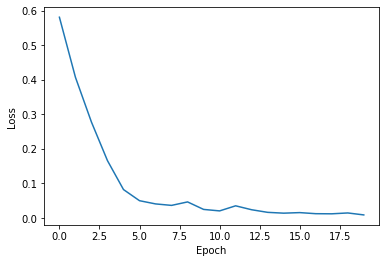

In [36]:
import matplotlib.pyplot as plt
plt.plot(loss_curve)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [37]:
test_ds = Dataset(df_test)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=True, num_workers=4)

In [38]:
model.eval()


# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


eval_accuracy = []
# Evaluate data for one epoch
for batch in test_loader:

    # Add batch to GPU
    #batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    text,y = batch
    input_ids = text['input_ids'].squeeze(1).to(device)
    input_mask = text['attention_mask'].to(device)
    y  = y.to(device)

    # Telling the model not to compute or store gradients, saving memory and
    # speeding up validation
    with torch.no_grad():        

        # Forward pass, calculate logit predictions.
        # This will return the logits rather than the loss because we have
        # not provided labels.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(input_ids, 
                        token_type_ids=None, 
                        attention_mask=input_mask)

    # Get the "logits" output by the model. The "logits" are the output
    # values prior to applying an activation function like the softmax.
    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    y = y.to('cpu').numpy()
    # Calculate the accuracy for this batch of test sentences.
    tmp_eval_accuracy = flat_accuracy(logits, y)
    print(tmp_eval_accuracy)
    # Accumulate the total accuracy.
    eval_accuracy.append(tmp_eval_accuracy)

0.8125
0.75
0.8125
0.8125
0.8125
0.78125
0.875
0.6875
0.75
0.84375
0.9375
0.90625
0.84375
0.78125
0.78125
0.84375
0.875
0.71875
0.6875
0.75
0.71875
0.875
0.875
0.875
0.78125
0.84375
0.84375
0.8125
0.8125
0.875
0.6875
0.75
0.84375
0.875
0.84375
0.84375
0.84375
0.8125
0.8125
0.8125
0.90625
0.78125
0.78125
0.78125
0.78125
0.875
0.90625
0.8125
0.875
0.8125
0.71875
0.7777777777777778


In [39]:
print(np.mean(eval_accuracy))

0.8136351495726496
